In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def wide_labels(x):
    if "ASIAN" in x:
        return "ASIAN"
    elif "AFRICAN" in x:
        return "BLACK"
    elif "HISPANIC" in x:
        return "HISPANIC"
    elif "WHITE" in x:
        return "WHITE"
    elif "NATIVE" in x:
        return "NATIVE"
    else:
        return "OTHER"

def narrow_labels(x):
    if "ASIAN" in x or "AFRICAN" in x or "HISPANIC" in x or "NATIVE" in x: 
        return "NON-WHITE"
    elif "WHITE" in x:
        return "WHITE"
    else:
        return "OTHER"

def get_ethnicity_labels(df, label_translation):
    df["ETHNICITY_LABEL"] = df["ETHNICITY"].apply(lambda x:label_translation(x))
    return df
    
def save_ethnicity_dataset(df, path_out, label_translation=None):
    if label_translation:
        df = get_ethnicity_labels(df, label_translation)
    df_ethnicity = df[["ETHNICITY_LABEL","TEXT"]]
    df_ethnicity["TEXT"] = df_ethnicity["TEXT"].apply(lambda x: x.replace("\n","").replace("\t","").lower())
    df_ethnicity.to_csv(path_out,index=False, sep="\t", header=False)
    

## Read Data

In [3]:
#read data
raw_data_path = "/Users/samir/Dev/resources/datasets/MIMIC/full/"
out_data_path = "/Users/samir/Dev/projects/TADAT/experiments/MIMIC/DATA/input/"

NOTEEVENTS = raw_data_path+"NOTEEVENTS.CSV.gz"
all_notes = pd.read_csv(NOTEEVENTS)

PATIENTS = raw_data_path+"PATIENTS.CSV.gz"
all_patients = pd.read_csv(PATIENTS)

ADMISSIONS = raw_data_path+"ADMISSIONS.CSV.gz"
all_admissions = pd.read_csv(ADMISSIONS)

#filter relevant columns
notes = all_notes[["TEXT"]]
patients = all_patients[["SUBJECT_ID","GENDER"]]
admissions = all_admissions[["INSURANCE","LANGUAGE","RELIGION","ETHNICITY"]]

/Users/samir/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#small sample
PATIENT_SAMPLE_SIZE = 3000
mini_patients = patients[:PATIENT_SAMPLE_SIZE]
mini_patients = mini_patients.join(admissions, how="inner", on="SUBJECT_ID",rsuffix="A_")
mini_patients = mini_patients.join(notes, how="inner", on="SUBJECT_ID",rsuffix="N_")


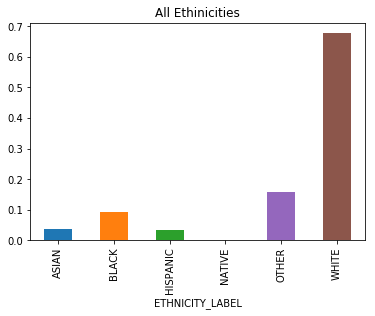

In [5]:
df = get_ethnicity_labels(mini_patients, wide_labels)
df2 = df.groupby("ETHNICITY_LABEL").size()/df.groupby("ETHNICITY_LABEL").size().sum()
df2.plot(kind="bar", title="All Ethinicities")

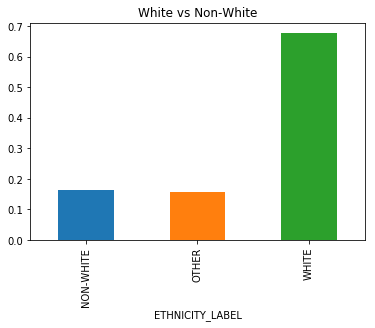

In [6]:
df = get_ethnicity_labels(mini_patients, narrow_labels)
df2 = df.groupby("ETHNICITY_LABEL").size()/df.groupby("ETHNICITY_LABEL").size().sum()
df2.plot(kind="bar", title="White vs Non-White")

In [7]:
save_ethnicity_dataset(mini_patients, out_data_path+"mini_ethnicity.csv",narrow_labels)

/Users/samir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
#full sample
patients = patients.join(admissions, how="inner", on="SUBJECT_ID",rsuffix="A_")
patients = patients.join(notes, how="inner", on="SUBJECT_ID",rsuffix="N_")


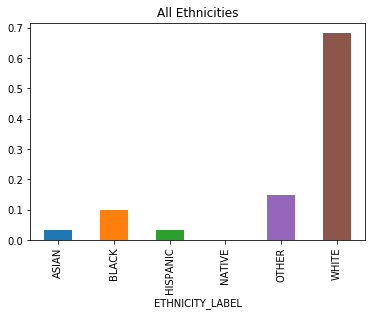

In [39]:
df = get_ethnicity_labels(patients, wide_labels)
df2 = df.groupby("ETHNICITY_LABEL").size()/df.groupby("ETHNICITY_LABEL").size().sum()
df2.plot(kind="bar", title="All Ethnicities")

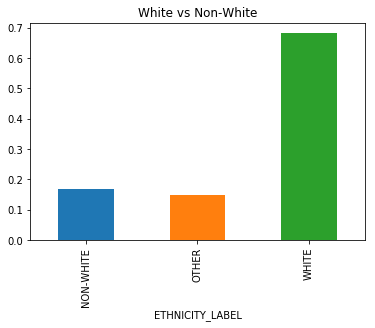

In [40]:
df = get_ethnicity_labels(patients, narrow_labels)
df2 = df.groupby("ETHNICITY_LABEL").size()/df.groupby("ETHNICITY_LABEL").size().sum()
df2.plot(kind="bar", title="White vs Non-White")

In [43]:
save_ethnicity_dataset(patients, out_data_path+"ethnicity.csv",narrow_labels)

/Users/samir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Results

In [58]:
from tadatk.pipeline import plots

In [71]:
results_path = "/Users/samir/Dev/projects/MIMIC/DATA/results/ble.txt"
res = pd.read_csv(results_path,sep="\t")
res

,model,seed,acc,microF1,W-f1,N-f1,O-f1
0,bow-bin,1,0.531,0.531,0.693,0.156,0.207
1,bow-bin,2,0.611,0.611,0.759,0.136,0.079
2,bow-bin,3,0.622,0.622,0.770,0.051,0.224
3,bow-bin,4,0.641,0.641,0.783,0.047,0.075
4,bow-bin,5,0.664,0.664,0.798,0.066,0.061
5,bow-freq,1,0.632,0.632,0.783,0.135,0.000
6,bow-freq,2,0.579,0.579,0.736,0.000,0.240
7,bow-freq,3,0.416,0.416,0.567,0.159,0.217
8,bow-freq,4,0.656,0.656,0.795,0.036,0.085
9,bow-freq,5,0.627,0.627,0.778,0.104,0.140


In [101]:
df_bb = res[res["model"] == "bow-bin"]
df_bf = res[res["model"] == "bow-freq"]


hello
hello


Text(0.5,1,'bow-bin')

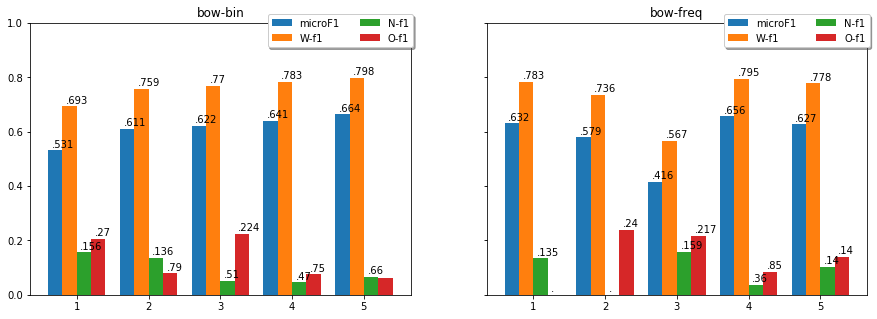

In [133]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

plots.plot_df(df=df_bb,ax=ax[0],x="seed",ys=["microF1","W-f1","N-f1","O-f1"], annotation_size=10)
plots.plot_df(df=df_bf,ax=ax[1],x="seed",ys=["microF1","W-f1","N-f1","O-f1"], annotation_size=10)


ax[0].set_title("bow-bin")
ax[1].set_title("bow-freq")



hello


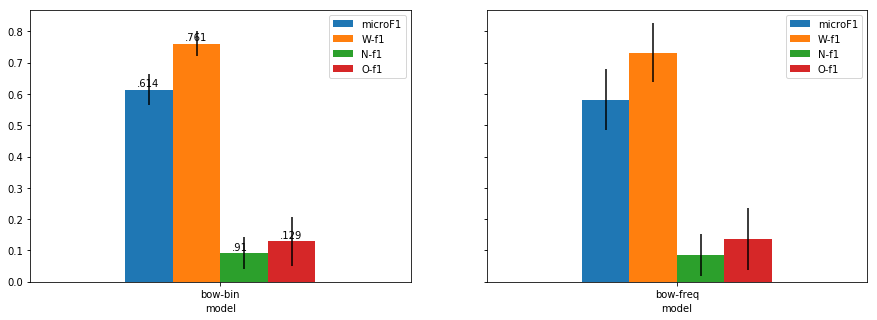

In [138]:
df_bb_mean = df_bb.groupby("model").mean()
df_bb_std = df_bb.groupby("model").std()

df_bf_mean = df_bf.groupby("model").mean()
df_bf_std = df_bf.groupby("model").std()

fig2, ax2 = plt.subplots(1,2, sharey=True, figsize=(15,5))
# df_bf_mean = df_bf.groupby("model").mean().reset_index()

df_bb_mean[["microF1","W-f1","N-f1","O-f1"]].plot(ax=ax2[0],legend=True,kind="bar",yerr=df_bb_std, rot=0)
df_bf_mean[["microF1","W-f1","N-f1","O-f1"]].plot(ax=ax2[1],legend=True,kind="bar",yerr=df_bf_std, rot=0)


hello
hello


Text(0.5,1,'bow-freq')

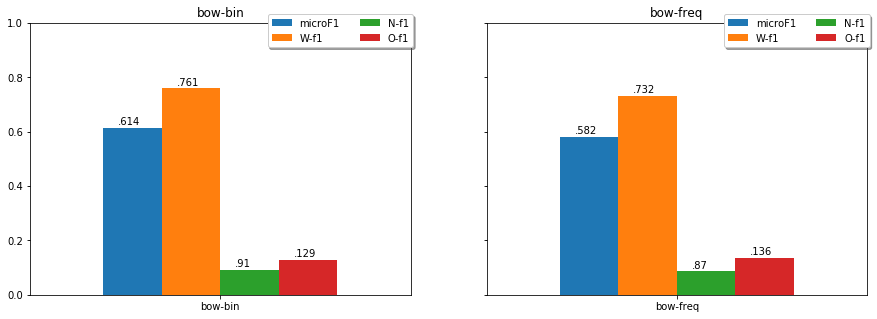

In [136]:
fig2, ax2 = plt.subplots(1,2, sharey=True, figsize=(15,5))

plots.plot_df(df=df_bb_mean.reset_index(),ax=ax2[0],x="model",ys=["microF1","W-f1","N-f1","O-f1"], annotation_size=10)
plots.plot_df(df=df_bf_mean.reset_index(),ax=ax2[1],x="model",ys=["microF1","W-f1","N-f1","O-f1"], annotation_size=10)


ax2[0].set_title("bow-bin")
ax2[1].set_title("bow-freq")

